In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import itertools


# Load Data

In [3]:
seed = 5
data_path = "ObesityDataSet_raw_and_data_sinthetic.csv"

In [4]:
from sklearn import preprocessing

# Read data
data = pd.read_csv(data_path, header=0)



to_encode = ['Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'FAVC', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
label_encoder = preprocessing.LabelEncoder()

df = data[to_encode]
df = df.apply(label_encoder.fit_transform)

data = data.drop(to_encode, axis=1)
data = pd.concat([data, df], axis=1)


data.describe()

# Last column represnets label, and others are features
features = np.array(data.iloc[:, 0:-1])
classes = np.array(data.iloc[:, -1])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe03f8d1cf8>,
      dtype=object)

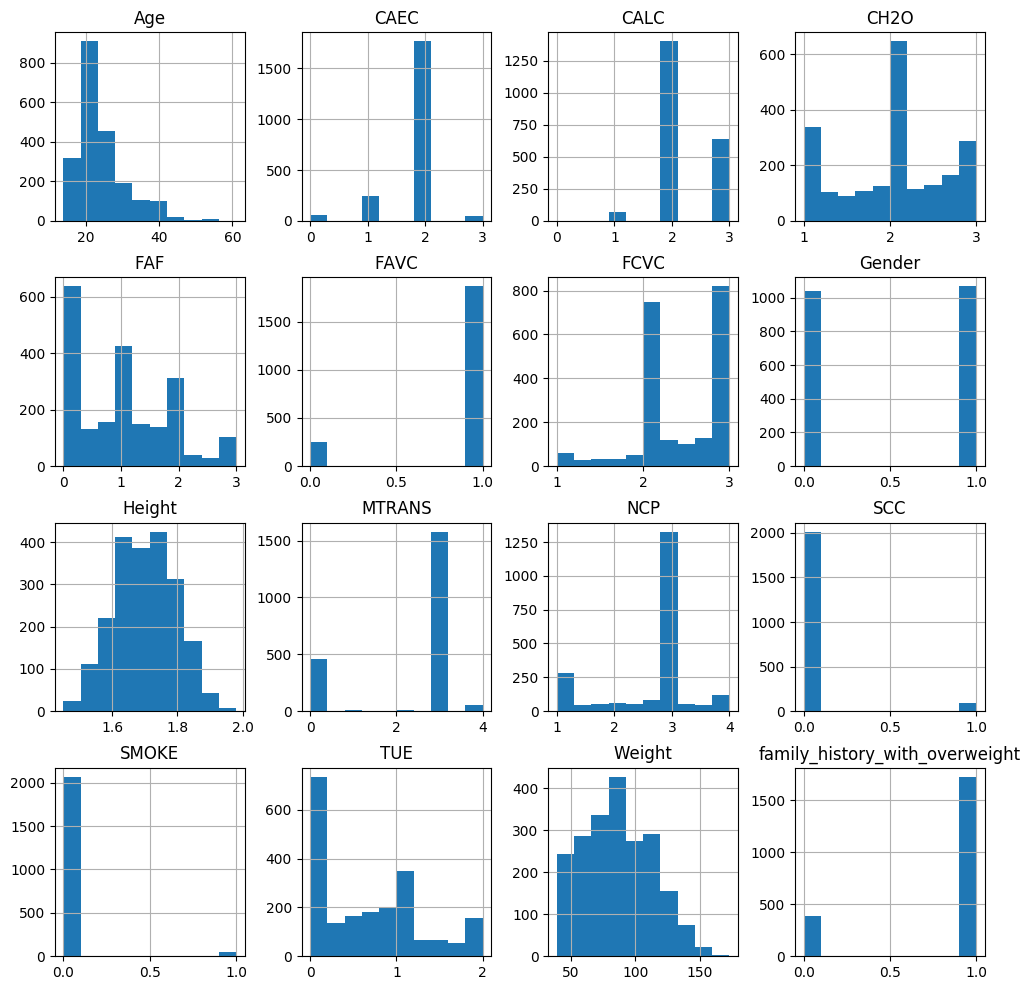

In [5]:
# draw hist for dataset
# data.hist(figsize=(12, 12))

data.iloc[:, 0:-1].hist(figsize=(12, 12))

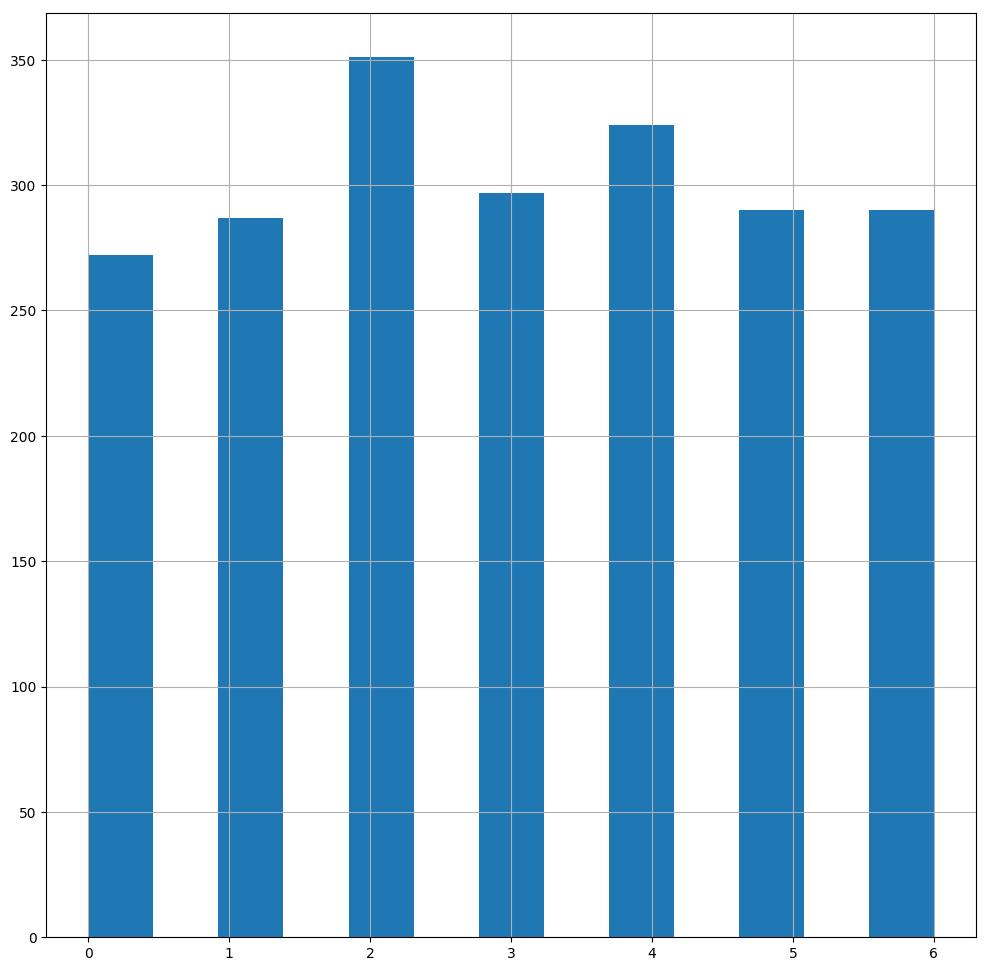

In [6]:
data.iloc[:, -1].hist(figsize=(12, 12), bins=13)

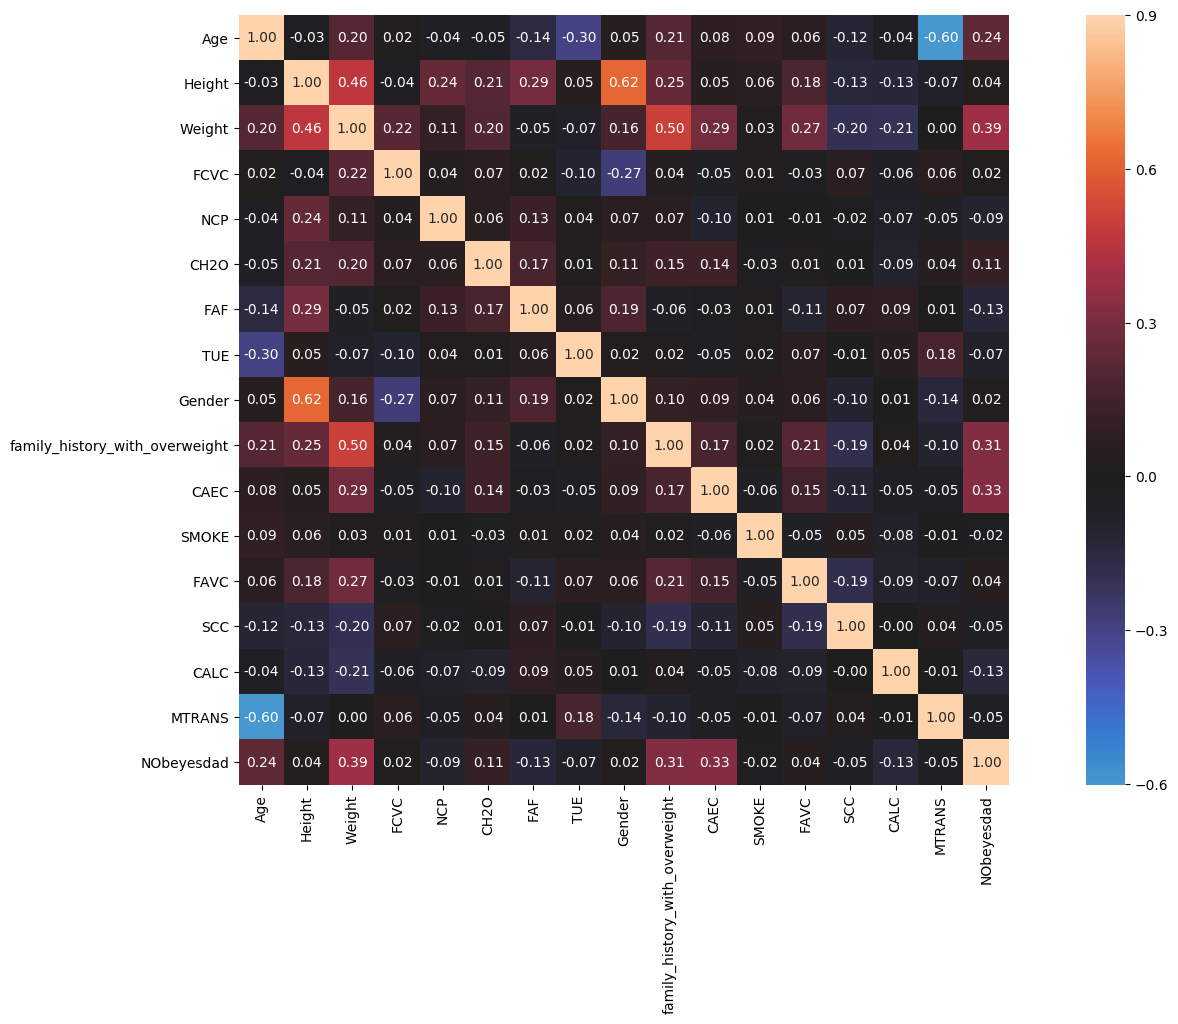

In [7]:
import seaborn as sns

plt.subplots(figsize=(20, 10))
sns.heatmap(data.corr(), vmax=.9, square=True, annot=True, fmt='.2f', center=0)
plt.show()

In [8]:
# split data
training_x, testing_x, training_y, testing_y = sklearn.model_selection.train_test_split(
features, classes, test_size=0.2, random_state=seed, stratify=classes)

In [9]:
print(training_x.shape)
print(testing_x.shape)
print(training_y.shape)
print(testing_y.shape)

(1688, 16)
(423, 16)
(1688,)
(423,)


In [10]:
from sklearn.preprocessing import StandardScaler

features = StandardScaler().fit_transform(features)
training_x = StandardScaler().fit_transform(training_x)
testing_x = StandardScaler().fit_transform(testing_x)


# Accuracy
### According to the fig above, the sample is not balanced (Death = 1 samples are significally fewer than Death = 0 samples), so we use "weighted" mode for accuracy calculating.

In [11]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import compute_sample_weight

def balanced_accuracy(truth, pred):
    wts = compute_sample_weight('balanced', truth)
    return accuracy_score(truth, pred, sample_weight=wts)

# Section 2: Boosting

In [24]:
n_estimators =  [2, 5, 10, 20, 30, 45, 60, 80, 90, 100]

max_depth = np.arange(3, 11)
min_samples_split = [2,3,4]
min_samples_leaf = [2,3,4]
# params = {'criterion': ['gini', 'entropy'], 'max_depth': max_depth, "min_samples_split": min_samples_split, "min_samples_leaf": min_samples_leaf
#           }


params = {'n_estimators': n_estimators, 'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__max_depth': max_depth, "base_estimator__min_samples_split": min_samples_split, "base_estimator__min_samples_leaf": min_samples_leaf}


Use grid search to find best params. Take a few minutes.

In [27]:
from sklearn import ensemble
from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeClassifier


base = DecisionTreeClassifier()
Boosting_classifier = ensemble.AdaBoostClassifier(base_estimator=base)
# print(Boosting_classifier.get_params().keys())
grid_seacher = sklearn.model_selection.GridSearchCV(Boosting_classifier, n_jobs=4, param_grid=params, 
                                                    refit=True, verbose=10, cv=5, scoring=make_scorer(accuracy_score))
grid_fit = grid_seacher.fit(training_x, training_y)


Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2 
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2 
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2 
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2, score=0.6217008797653959, total=   0.0s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__

[Parallel(n_jobs=4)]: Batch computation too fast (0.0397s.) Setting batch_size=10.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s



[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20, score=0.8184523809523809, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10 
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10, score=0.7352941176470589, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=

[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60, score=0.8308605341246291, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45, score=0.8205882352941176, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2

[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    2.1s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5, score=0.6235294117647059, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5 [CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10, score=0.7352941176470589, total=   0.1s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5, score=0.5786350148367952, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.8982035928143712, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45, score=0.8240469208211144, total=   0.2s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=60, score=0.8592375366568915, total=   0.3s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45 [CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Batch computation too slow (2.1046s.) Setting batch_size=5.


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=60, score=0.8294117647058824, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100, score=0.9002932551319648, total=   0.5s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45, score=0.7893175074183977, total=   0.2s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100 
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_l

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=5, score=0.6235294117647059, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.7352941176470589, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=5, score=0.5786350148367952, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2

[Parallel(n_jobs=4)]: Done  98 tasks      | elapsed:    6.1s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30, score=0.744807121661721, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=45, score=0.8779761904761905, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.8813056379821959, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf

[Parallel(n_jobs=4)]: Batch computation too slow (3.7389s.) Setting batch_size=2.


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80, score=0.8869047619047619, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80, score=0.8705882352941177, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90, score=0.8898809523809523, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10, score=0.6646706586826348, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=4)]: Done 148 tasks      | elapsed:    9.1s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20, score=0.7565982404692082, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100, score=0.8772455089820359, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2, score=0.6217008797653959, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf

[Parallel(n_jobs=4)]: Done 175 tasks      | elapsed:   10.1s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60, score=0.8264705882352941, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=45, score=0.8273809523809523, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60, score=0.8303571428571429, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Done 193 tasks      | elapsed:   11.8s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100, score=0.8931750741839762, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90, score=0.8832335329341318, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=2, score=0.5705882352941176, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20, score=0.8, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20, score=0.8244047619047619, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30, score=0.8235294117647058, total=   0.1s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estim

[Parallel(n_jobs=4)]: Done 215 tasks      | elapsed:   12.7s



[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.8269794721407625, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30, score=0.7626112759643917, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=

[Parallel(n_jobs=4)]: Done 237 tasks      | elapsed:   14.2s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=80, score=0.8690476190476191, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=90, score=0.8914956011730205, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=90, score=0.8809523809523809, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_l

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=10, score=0.6616766467065869, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=20, score=0.7565982404692082, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=20 [CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=20, score=0.7359050445103857, total=   0.1s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Done 263 tasks      | elapsed:   15.6s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.8323529411764706, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.7947214076246334, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.8005952380952381, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Done 289 tasks      | elapsed:   17.4s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.8709677419354839, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.8869047619047619, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.9080118694362018, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_le

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.7536656891495601, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.7744807121661721, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.7485029940119761, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Done 319 tasks      | elapsed:   18.9s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45, score=0.8475073313782991, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30, score=0.7833827893175074, total=   0.1s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30, score=0.8053892215568862, total=   0.1s[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45 

[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90, score=0.8892215568862275, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2, score=0.5705882352941176, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2, score=0.5875370919881305, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4,

[Parallel(n_jobs=4)]: Done 349 tasks      | elapsed:   21.6s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5, score=0.543026706231454, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100, score=0.8682634730538922, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2 [CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5, score=0.6309523809523809, total=   0.1s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4,

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.8308605341246291, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.8173652694610778, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.8470588235294118, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Done 383 tasks      | elapsed:   23.3s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60, score=0.8622754491017964, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80, score=0.8605341246290801, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80, score=0.8862275449101796, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100, score=0.8676470588235294, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10, score=0.7352941176470589, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10, score=0.5894428152492669, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_le

[Parallel(n_jobs=4)]: Done 417 tasks      | elapsed:   25.6s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30, score=0.7833827893175074, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45, score=0.8357771260997068, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30, score=0.7664670658682635, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90, score=0.9221556886227545, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2, score=0.7529411764705882, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2, score=0.5519287833827893, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2,

[Parallel(n_jobs=4)]: Done 455 tasks      | elapsed:   28.4s



[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20, score=0.8982035928143712, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20, score=0.8764705882352941, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.9235294117647059, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100 [CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90 

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.9589442815249267, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split

[Parallel(n_jobs=4)]: Done 493 tasks      | elapsed:   30.6s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100, score=0.9584569732937686, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.9461077844311377, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=2, score=0.7558823529411764, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.9011976047904192, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=30, score=0.8794117647058823, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=30, score=0.9107142857142857, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Done 535 tasks      | elapsed:   33.0s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9285714285714286, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90, score=0.9323529411764706, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90, score=0.9560117302052786, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_lea

[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=2, score=0.6744868035190615, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.8832335329341318, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, 

[Parallel(n_jobs=4)]: Done 577 tasks      | elapsed:   35.4s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9136904761904762, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9560117302052786, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9584569732937686, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100, score=0.9550898203592815, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5, score=0.7946428571428571, total=   0.0s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2, score=0.6832844574780058, total=   0.0s[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5 

[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=45, score=0.9029411764705882, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60 


[Parallel(n_jobs=4)]: Done 623 tasks      | elapsed:   38.1s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=45, score=0.9431137724550899, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60, score=0.9117647058823529, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=45, score=0.9136904761904762, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5, score=0.6891495601173021, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5, score=0.7264705882352941, total=   0.0s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100, score=0.9580838323353293, total=   0.5s[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5 

[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3

[Parallel(n_jobs=4)]: Done 669 tasks      | elapsed:   40.8s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.9266862170087976, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30, score=0.9341317365269461, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.9347181008902077, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.7617647058823529, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.5489614243323442, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.6398809523809523, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, 

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.9090909090909091, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.8441176470588235, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.8928571428571429, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Done 719 tasks      | elapsed:   43.8s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.9296187683284457, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.887240356083086, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.9251497005988024, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2, score=0.7617647058823529, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2, score=0.543026706231454, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2, score=0.6398809523809523, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, b

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30, score=0.9208211143695014, total=   0.1s[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30 

[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30, score=0.9047619047619048, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2

[Parallel(n_jobs=4)]: Done 769 tasks      | elapsed:   47.2s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30, score=0.9491017964071856, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45, score=0.9472140762463344, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=60, score=0.9107142857142857, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90, score=0.9431137724550899, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2, score=0.7617647058823529, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2, score=0.5489614243323442, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4,

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20, score=0.875, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100, score=0.9375, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30, score=0.8794117647058823, total=   0.1s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__mi

[Parallel(n_jobs=4)]: Done 823 tasks      | elapsed:   50.5s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.9, total=   0.2s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.9401197604790419, total=   0.2s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60 [CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60 

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.9136904761904762, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estim

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2, score=0.6586826347305389, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5, score=0.6275659824046921, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5, score=0.7264705882352941, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, 

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30, score=0.857566765578635, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45, score=0.9354838709677419, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30, score=0.9461077844311377, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf

[Parallel(n_jobs=4)]: Done 877 tasks      | elapsed:   53.7s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60, score=0.9413489736070382, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60, score=0.9285714285714286, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60, score=0.9465875370919882, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=100, score=0.9461077844311377, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5, score=0.8690476190476191, total=   0.0s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2, score=0.8709677419354839, total=   0.0s[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5 

[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45, score=0.9580838323353293, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45, score=0.9352941176470588, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45, score=0.9375, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_es

[Parallel(n_jobs=4)]: Done 935 tasks      | elapsed:   57.6s


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80, score=0.9640718562874252, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80, score=0.95, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.9323529411764706, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_esti

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10, score=0.9323529411764706, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10, score=0.9047619047619048, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10, score=0.9287833827893175, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=60, score=0.9614243323442137, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9706744868035191, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=60, score=0.9610778443113772, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Done 993 tasks      | elapsed:  1.0min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=100, score=0.9703264094955489, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90, score=0.9640718562874252, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=2, score=0.8, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estim

[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30 [CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=20, score=0.9461077844311377, total=   0.1s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=20, score=0.9255952380952381, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4

[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90, score=0.9553571428571429, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90, score=0.9643916913946587, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split

[Parallel(n_jobs=4)]: Done 1055 tasks      | elapsed:  1.1min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10, score=0.9131736526946108, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20, score=0.9589442815249267, total=   0.1s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20, score=0.9614243323442137, total=   0.1s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20 [CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf

[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80, score=0.9550898203592815, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80, score=0.9382352941176471, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2

[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10, score=0.9411764705882353, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10, score=0.8869047619047619, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3

[Parallel(n_jobs=4)]: Done 1117 tasks      | elapsed:  1.2min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.9648093841642229, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30, score=0.9614243323442137, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30, score=0.9341317365269461, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=90, score=0.9550898203592815, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.7970588235294118, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.771513353115727, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, 

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=20, score=0.9315476190476191, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.9352941176470588, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.9648093841642229, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Done 1183 tasks      | elapsed:  1.2min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=60, score=0.9550898203592815, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=80, score=0.973293768545994, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=80, score=0.9550898203592815, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100, score=0.95, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=10, score=0.9384164222873901, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=10, score=0.9147058823529411, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_est

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60, score=0.9824046920821115, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60, score=0.9494047619047619, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60, score=0.9614243323442137, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5, score=0.8720238095238095, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5, score=0.8772455089820359, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10 


[Parallel(n_jobs=4)]: Done 1249 tasks      | elapsed:  1.3min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100, score=0.9670658682634731, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2, score=0.873900293255132, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100, score=0.95, total=   0.6s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_esti

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.9285714285714286, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60, score=0.95, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60, score=0.9736070381231672, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_esti

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5, score=0.7941176470588235, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5, score=0.8783382789317508, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5, score=0.8720238095238095, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, 

[Parallel(n_jobs=4)]: Done 1319 tasks      | elapsed:  1.4min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30, score=0.9643916913946587, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30, score=0.9461077844311377, total=   0.2s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45, score=0.9706744868035191, total=   0.2s[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60 

[CV] base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90, score=0.9580838323353293, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2, score=0.8558823529411764, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2, score=0.9258160237388724, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2,

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20, score=0.9345238095238095, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=30, score=0.9470588235294117, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=30, score=0.9736070381231672, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Done 1389 tasks      | elapsed:  1.5min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.9765395894428153, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.9375, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.9821958456973294, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_e

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.9706744868035191, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.9584569732937686, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100, score=0.9613095238095238, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_le

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9670658682634731, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9470588235294117, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90, score=0.9558823529411765, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=100, score=0.9441176470588235, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.9673590504451038, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.9345238095238095, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_le

[Parallel(n_jobs=4)]: Done 1463 tasks      | elapsed:  1.6min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30, score=0.9470588235294117, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30, score=0.9765395894428153, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30, score=0.9494047619047619, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90, score=0.9792284866468842, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100, score=0.9824046920821115, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100, score=0.973293768545994, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100, score=0.9494047619047619, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20, score=0.9294117647058824, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20, score=0.9520958083832335, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_le

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90, score=0.9558823529411765, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90 


[Parallel(n_jobs=4)]: Done 1537 tasks      | elapsed:  1.7min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80, score=0.9642857142857143, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90, score=0.9794721407624634, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90, score=0.9672619047619048, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_l

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10, score=0.9401197604790419, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20 [CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20, score=0.9648093841642229, total=   0.1s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20, score=0.9762611275964391, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=80, score=0.9792284866468842, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=80, score=0.9520958083832335, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=80, score=0.9382352941176471, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_lea

[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=10 
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=10 

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=100, score=0.95, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=10, score=0.9673590504451038, total=   0.1s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimator

[Parallel(n_jobs=4)]: Done 1615 tasks      | elapsed:  1.8min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.9434523809523809, total=   0.2s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.9706744868035191, total=   0.2s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30 [CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45 

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.9703264094955489, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100, score=0.967741935483871, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100, score=0.9762611275964391, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.9610778443113772, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.9491017964071856, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.9205882352941176, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.9613095238095238, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=80, score=0.9464285714285714, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90, score=0.9824046920821115, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90, score=0.9583333333333334, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_l

[Parallel(n_jobs=4)]: Done 1693 tasks      | elapsed:  1.9min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100, score=0.9762611275964391, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90, score=0.9580838323353293, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2, score=0.8529411764705882, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20, score=0.9147058823529411, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20, score=0.9583333333333334, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30, score=0.95, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_esti

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90, score=0.9736070381231672, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90, score=0.9523809523809523, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90, score=0.973293768545994, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10, score=0.9341317365269461, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20, score=0.9584569732937686, total=   0.1s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100, score=0.9613095238095238, total=   0.7s[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20 

[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_le

[Parallel(n_jobs=4)]: Done 1775 tasks      | elapsed:  2.0min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45, score=0.9520958083832335, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60 [CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45, score=0.9529411764705882, total=   0.3s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60, score=0.9529411764705882, total=   0.4s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2, score=0.9041916167664671, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5, score=0.9354838709677419, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5, score=0.9058823529411765, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, 

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=30, score=0.9643916913946587, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45, score=0.9824046920821115, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=30, score=0.9550898203592815, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.9520958083832335, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=2, score=0.9029411764705882, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=2, score=0.9080118694362018, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2,

[Parallel(n_jobs=4)]: Done 1857 tasks      | elapsed:  2.1min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.967741935483871, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100, score=0.9523809523809523, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.9584569732937686, total=   0.1s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9700598802395209, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.95, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90, score=0.9588235294117647, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_esti

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.9642857142857143, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 [CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=100, score=0.95, total=   0.7s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.9495548961424333, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_est

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9703264094955489, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80, score=0.9706744868035191, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9610778443113772, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Done 1943 tasks      | elapsed:  2.2min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100, score=0.9824046920821115, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90, score=0.9580838323353293, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2, score=0.8794117647058823, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100, score=0.9642857142857143, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20, score=0.9441176470588235, total=   0.1s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20, score=0.9434523809523809, total=   0.1s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=30 [CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80, score=0.9642857142857143, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90, score=0.9736070381231672, total=   0.6s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90, score=0.9494047619047619, total=   0.6s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90 [CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10, score=0.9580838323353293, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20, score=0.9706744868035191, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20, score=0.9643916913946587, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Done 2029 tasks      | elapsed:  2.3min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60, score=0.9494047619047619, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60, score=0.9824046920821115, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60, score=0.973293768545994, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5, score=0.9315476190476191, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5, score=0.9461077844311377, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=100, score=0.9670658682634731, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.9640718562874252, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.95, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.9672619047619048, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_esti

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2, score=0.907185628742515, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=5, score=0.9618768328445748, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=5, score=0.9176470588235294, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, b

[Parallel(n_jobs=4)]: Done 2119 tasks      | elapsed:  2.4min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45, score=0.9765395894428153, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30, score=0.9673590504451038, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30, score=0.9550898203592815, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90, score=0.9640718562874252, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2, score=0.888235294117647, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2, score=0.9228486646884273, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, 

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20, score=0.9613095238095238, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30, score=0.9588235294117647, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30, score=0.9853372434017595, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90, score=0.9761904761904762, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90, score=0.9762611275964391, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100, score=0.9794721407624634, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_l

[Parallel(n_jobs=4)]: Done 2209 tasks      | elapsed:  2.6min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20, score=0.9584569732937686, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20, score=0.9529411764705882, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100, score=0.9613095238095238, total=   0.7s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_le

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80, score=0.9441176470588235, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90, score=0.9441176470588235, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80, score=0.9642857142857143, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=7, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10, score=0.9762611275964391, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10, score=0.9464285714285714, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20, score=0.9824046920821115, total=   0.1s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80, score=0.9853372434017595, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60, score=0.9670658682634731, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80, score=0.9703264094955489, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5, score=0.9491017964071856, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10, score=0.9352941176470588, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100, score=0.9558823529411765, total=   0.7s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_le

[Parallel(n_jobs=4)]: Done 2303 tasks      | elapsed:  2.7min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10, score=0.9494047619047619, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.9765395894428153, total=   0.1s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10, score=0.9401197604790419, total=   0.1s[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20 

[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=60, score=0.9670658682634731, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9673590504451038, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9610778443113772, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.9352941176470588, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.9824046920821115, total=   0.1s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=100, score=0.95, total=   0.7s[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 

[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_est

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9736070381231672, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9613095238095238, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9643916913946587, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2, score=0.9648093841642229, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5, score=0.9228486646884273, total=   0.0s

[Parallel(n_jobs=4)]: Done 2397 tasks      | elapsed:  2.8min



[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5, score=0.9221556886227545, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5, score=0.9255952380952381, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10 [CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n

[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=45, score=0.9642857142857143, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60, score=0.95, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators

[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5, score=0.9264705882352942, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5, score=0.9406528189910979, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_e

[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30, score=0.9550898203592815, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.9673590504451038, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3

[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.9287833827893175, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.9077380952380952, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_e

[Parallel(n_jobs=4)]: Done 2495 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Batch computation too slow (2.0064s.) Setting batch_size=1.



[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5, score=0.9525222551928784, total=   0.0s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=100, score=0.9580838323353293, total=   0.7s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5 [CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.9560117302052786, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.9529411764705882, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.973293768545994, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.9613095238095238, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2, score=0.9198813056379822, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2, score=0.9315476190476191, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2, score=0.9011976047904192, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, 

[Parallel(n_jobs=4)]: Done 2551 tasks      | elapsed:  3.1min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=5, score=0.9431137724550899, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=10, score=0.9736070381231672, total=   0.1s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100, score=0.9553571428571429, total=   0.8s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=10 
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60, score=0.9882697947214076, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60 [CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60, score=0.9647058823529412, total=   0.4s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60, score=0.9762611275964391, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_lea

[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5 [CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5 

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5, score=0.9376854599406528, total=   0.0s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5, score=0.8852941176470588, total=   0.0s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5 [CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_est

[Parallel(n_jobs=4)]: Done 2602 tasks      | elapsed:  3.1min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100, score=0.9583333333333334, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10, score=0.967741935483871, total=   0.1s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10, score=0.9058823529411765, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10 
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60, score=0.9821958456973294, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60, score=0.9613095238095238, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60, score=0.9640718562874252, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100, score=0.973293768545994, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100, score=0.9613095238095238, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5, score=0.9436201780415431, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=

[Parallel(n_jobs=4)]: Done 2653 tasks      | elapsed:  3.2min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10, score=0.9323529411764706, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10, score=0.9554896142433235, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10, score=0.9583333333333334, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60, score=0.9613095238095238, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60, score=0.9610778443113772, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80, score=0.9824046920821115, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=8, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5, score=0.9434523809523809, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5, score=0.9670658682634731, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10, score=0.9765395894428153, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=

[Parallel(n_jobs=4)]: Done 2706 tasks      | elapsed:  3.3min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10, score=0.9703264094955489, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10, score=0.9672619047619048, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10, score=0.9670658682634731, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_lea

[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80, score=0.9853372434017595, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80, score=0.9529411764705882, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5, score=0.9640718562874252, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10, score=0.9706744868035191, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100, score=0.9702380952380952, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Done 2759 tasks      | elapsed:  3.4min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.9824046920821115, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.9441176470588235, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.9792284866468842, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9673590504451038, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9583333333333334, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9640718562874252, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.9470588235294117, total=   0.1s[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 

[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.9554896142433235, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4

[Parallel(n_jobs=4)]: Done 2814 tasks      | elapsed:  3.5min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=20, score=0.9613095238095238, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=20, score=0.9670658682634731, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30, score=0.9588235294117647, total=   0.2s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90, score=0.9470588235294117, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90, score=0.9821958456973294, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90, score=0.9761904761904762, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_l

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100, score=0.9700598802395209, total=   0.8s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20, score=0.9736070381231672, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20, score=0.9529411764705882, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_le

[Parallel(n_jobs=4)]: Done 2869 tasks      | elapsed:  3.5min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=30, score=0.9411764705882353, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=30, score=0.973293768545994, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=30, score=0.9672619047619048, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90, score=0.9670658682634731, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100, score=0.9794721407624634, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100, score=0.95, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100, score=0.9640718562874252, total=   0.8s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20, score=0.9672619047619048, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20, score=0.9401197604790419, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_le

[Parallel(n_jobs=4)]: Done 2926 tasks      | elapsed:  3.6min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.9613095238095238, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.9550898203592815, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60, score=0.9853372434017595, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_lea

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.937125748502994, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5, score=0.9618768328445748, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=100, score=0.9673590504451038, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3,

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.9610778443113772, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.9794721407624634, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.9529411764705882, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Done 2983 tasks      | elapsed:  3.7min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=60, score=0.9610778443113772, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=80, score=0.9794721407624634, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=80, score=0.961764705882353, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=5, score=0.937125748502994, total=   0.0s[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=10 

[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100, score=0.9702380952380952, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2,

[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60, score=0.9765395894428153, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60, score=0.95, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators

[Parallel(n_jobs=4)]: Done 3042 tasks      | elapsed:  3.8min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90, score=0.9762611275964391, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90, score=0.9702380952380952, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90, score=0.9700598802395209, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_l

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20, score=0.9736070381231672, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20, score=0.961764705882353, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20, score=0.9614243323442137, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80, score=0.9642857142857143, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80, score=0.9610778443113772, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90, score=0.9824046920821115, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_lea

[Parallel(n_jobs=4)]: Done 3101 tasks      | elapsed:  3.9min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100, score=0.9672619047619048, total=   0.8s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10, score=0.9765395894428153, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10, score=0.9147058823529411, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_le

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60, score=0.9647058823529412, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60, score=0.9792284866468842, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60, score=0.9613095238095238, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=9, base_estimator__min_samples_lea

[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5 
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5, score=0.9406528189910979, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5, score=0.9464285714285714, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2

[Parallel(n_jobs=4)]: Done 3162 tasks      | elapsed:  4.0min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20, score=0.9584569732937686, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20, score=0.9672619047619048, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20, score=0.9610778443113772, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_sampl

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.9853372434017595, total=   0.8s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.9529411764705882, total=   0.8s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.973293768545994, total=   0.9s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_sampl

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10, score=0.9670658682634731, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.9470588235294117, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100, score=0.9700598802395209, total=   0.8s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samp

[Parallel(n_jobs=4)]: Done 3223 tasks      | elapsed:  4.1min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45, score=0.9765395894428153, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45, score=0.95, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45, score=0.973293768545994, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=2, score=0.9648093841642229, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=2, score=0.8911764705882353, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=2, score=0.9198813056379822, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_le

[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30, score=0.9470588235294117, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30, score=0.9703264094955489, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_s

[Parallel(n_jobs=4)]: Done 3286 tasks      | elapsed:  4.2min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80, score=0.9792284866468842, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80, score=0.9702380952380952, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80, score=0.9640718562874252, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_sampl

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10, score=0.9411764705882353, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10, score=0.9792284866468842, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10, score=0.9613095238095238, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_sampl

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60, score=0.9613095238095238, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60, score=0.9640718562874252, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80, score=0.9794721407624634, total=   0.6s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_sampl

[Parallel(n_jobs=4)]: Done 3349 tasks      | elapsed:  4.3min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5, score=0.9345238095238095, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5, score=0.9520958083832335, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10, score=0.9706744868035191, total=   0.1s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_sample

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.9580838323353293, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60, score=0.9705882352941176, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60, score=0.9824046920821115, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_sampl

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5, score=0.967741935483871, total=   0.0s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=100, score=0.9673590504451038, total=   0.7s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5 [CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5 

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5, score=0.9264705882352942, total=   0.0s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_l

[Parallel(n_jobs=4)]: Done 3414 tasks      | elapsed:  4.4min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=20, score=0.9464285714285714, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=20, score=0.9550898203592815, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.9794721407624634, total=   0.2s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_sampl

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.95, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.973293768545994, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.9642857142857143, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, ba

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100, score=0.9610778443113772, total=   0.8s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.95, total=   0.2s[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.9824046920821115, total=   0.2s

[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20 
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, ba

[Parallel(n_jobs=4)]: Done 3479 tasks      | elapsed:  4.5min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45, score=0.9640718562874252, total=   0.4s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60, score=0.9853372434017595, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60, score=0.95, total=   0.5s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, bas

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5, score=0.9442815249266863, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5, score=0.9323529411764706, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5, score=0.9347181008902077, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_le

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.9824046920821115, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.9588235294117647, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.9792284866468842, total=   0.3s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_sampl

[Parallel(n_jobs=4)]: Done 3546 tasks      | elapsed:  4.6min


[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100, score=0.9411764705882353, total=   0.8s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2, score=0.9501466275659824, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2, score=0.9058823529411765, total=   0.0s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20, score=0.9580838323353293, total=   0.1s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30, score=0.9882697947214076, total=   0.2s
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30, score=0.9411764705882353, total=   0.2s[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30 

[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_sampl

[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90, score=0.9762611275964391, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90, score=0.9642857142857143, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90, score=0.9610778443113772, total=   0.7s
[CV] base_estimator__criterion=gini, base_estimator__max_depth=10, base_estimator__min_sam

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20, score=0.8357771260997068, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20, score=0.7922848664688428, total=   0.2s[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20, score=0.7852941176470588, total=   0.2s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimato

[Parallel(n_jobs=4)]: Done 3613 tasks      | elapsed:  4.7min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20, score=0.7916666666666666, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20, score=0.7395209580838323, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=30, score=0.8563049853372434, total=   0.2s
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.8852941176470588, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.9287833827893175, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator_

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10, score=0.7724550898203593, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.8357771260997068, total=   0.2s
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.7852941176470588, total=   0.2s[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.7922848664688428, total=   0.2s[CV]  base_estimator__criterion=entropy, ba

[Parallel(n_jobs=4)]: Done 3682 tasks      | elapsed:  4.8min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=60, score=0.8809523809523809, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=60, score=0.8652694610778443, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9266862170087976, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=5, score=0.5714285714285714, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=5, score=0.7035928143712575, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=45, score=0.8511904761904762, total=   0.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=45, score=0.8353293413173652, total=   0.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9032258064516129, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2, score=0.5598802395209581, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5, score=0.6011730205278593, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=2, base_estimator__min_sa

[Parallel(n_jobs=4)]: Done 3751 tasks      | elapsed:  5.0min



[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5 [CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10 

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5, score=0.7035928143712575, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10, score=0.6598240469208211, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=45, score=0.8712574850299402, total=   0.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60, score=0.8621700879765396, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=2, score=0.5598802395209581, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100, score=0.8931750741839762, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5, score=0.6011730205278593, total=   0.0s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 


[Parallel(n_jobs=4)]: Done 3822 tasks      | elapsed:  5.1min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30, score=0.8532934131736527, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.8768328445747801, total=   0.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.8294117647058824, total=   0.4s
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.4809384164222874, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.5705882352941176, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_sa

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=20, score=0.8023952095808383, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.8240469208211144, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.7823529411764706, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.9020771513353115, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 


[Parallel(n_jobs=4)]: Done 3893 tasks      | elapsed:  5.2min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.9285714285714286, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.9161676646706587, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100, score=0.9149560117302052, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estim

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.7852941176470588, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.8308605341246291, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=80, score=0.8839285714285714, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=80, score=0.9041916167664671, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90, score=0.9149560117302052, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10, score=0.5875370919881305, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10, score=0.6488095238095238, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__m

[Parallel(n_jobs=4)]: Done 3966 tasks      | elapsed:  5.3min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20, score=0.8023952095808383, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30, score=0.8123167155425219, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30, score=0.7823529411764706, total=   0.2s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90, score=0.9376854599406528, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90, score=0.8898809523809523, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20, score=0.7741935483870968, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20, score=0.7852941176470588, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100, score=0.9101796407185628, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80, score=0.9050445103857567, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80, score=0.9166666666666666, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__m

[Parallel(n_jobs=4)]: Done 4039 tasks      | elapsed:  5.4min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90, score=0.8973607038123167, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90, score=0.8647058823529412, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90, score=0.9109792284866469, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10, score=0.8952095808383234, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=3, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=100, score=0.9131736526946108, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80, score=0.9648093841642229, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80, score=0.9294117647058824, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80, score=0.9525222551928784, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10, score=0.8387096774193549, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10, score=0.85, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_spl

[Parallel(n_jobs=4)]: Done 4114 tasks      | elapsed:  5.6min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.9169139465875371, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.9017857142857143, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.9401197604790419, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90, score=0.9706744868035191, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90, score=0.9411764705882353, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.8452380952380952, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.8952095808383234, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=100, score=0.9550898203592815, total=   1.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80, score=0.9560117302052786, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80, score=0.9352941176470588, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__m

[Parallel(n_jobs=4)]: Done 4189 tasks      | elapsed:  5.7min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80, score=0.9550898203592815, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90, score=0.9648093841642229, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90, score=0.95, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10, score=0.8961424332344213, total=   0.1s[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10, score=0.8601190476190477, total=   0.1s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20 
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10, score=0.8323353293413174, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60, score=0.9491017964071856, total=   0.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80, score=0.967741935483871, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__mi

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5, score=0.8630952380952381, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5, score=0.8383233532934131, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10, score=0.8533724340175953, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator_

[Parallel(n_jobs=4)]: Done 4266 tasks      | elapsed:  5.9min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20, score=0.9136904761904762, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20, score=0.9431137724550899, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30, score=0.9384164222873901, total=   0.3s[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=90, score=0.9294117647058824, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=90, score=0.9584569732937686, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator_

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=10, score=0.8323353293413174, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=100, score=0.9550898203592815, total=   1.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=20 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=20, score=0.9208211143695014, total=   0.2s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=80, score=0.9382352941176471, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=80, score=0.973293768545994, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__mi

[Parallel(n_jobs=4)]: Done 4343 tasks      | elapsed:  6.1min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.9523809523809523, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.9550898203592815, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100, score=0.9589442815249267, total=   1.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estim

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.9258160237388724, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100, score=0.9431137724550899, total=   1.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=80, score=0.9670658682634731, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90, score=0.9648093841642229, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90, score=0.9264705882352942, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10, score=0.9196428571428571, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10, score=0.8323353293413174, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__m

[Parallel(n_jobs=4)]: Done 4422 tasks      | elapsed:  6.2min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30, score=0.9491017964071856, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.9706744868035191, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.9323529411764706, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2, score=0.6656891495601173, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2, score=0.7529411764705882, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_sa

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20, score=0.9251497005988024, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30, score=0.9325513196480938, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30, score=0.9264705882352942, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90, score=0.9614243323442137, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90, score=0.9434523809523809, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator

[Parallel(n_jobs=4)]: Done 4501 tasks      | elapsed:  6.4min



[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5, score=0.9077380952380952, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5, score=0.9221556886227545, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=4, base_estimator__min_samples_leaf=4, base_estimator__min

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45, score=0.9583333333333334, total=   0.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45, score=0.9670658682634731, total=   0.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60, score=0.9736070381231672, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=2, score=0.8083832335329342, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5, score=0.8475073313782991, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_sa

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=30, score=0.9553571428571429, total=   0.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=30, score=0.9580838323353293, total=   0.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45, score=0.9706744868035191, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimato

[Parallel(n_jobs=4)]: Done 4582 tasks      | elapsed:  6.6min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=60, score=0.9523809523809523, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=60, score=0.9580838323353293, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9794721407624634, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=5, score=0.9047619047619048, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=5, score=0.9221556886227545, total=   0.1s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=45, score=0.9583333333333334, total=   0.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=45, score=0.9580838323353293, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9794721407624634, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2, score=0.811377245508982, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5, score=0.8504398826979472, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_sam

[Parallel(n_jobs=4)]: Done 4663 tasks      | elapsed:  6.8min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100, score=0.9640718562874252, total=   1.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20, score=0.9530791788856305, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=20, score=0.9264705882352942, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80, score=0.9643916913946587, total=   1.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80, score=0.9583333333333334, total=   1.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100, score=0.9672619047619048, total=   1.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10, score=0.8794117647058823, total=   0.1s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10, score=0.9614243323442137, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60, score=0.9792284866468842, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60, score=0.9613095238095238, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__m

[Parallel(n_jobs=4)]: Done 4746 tasks      | elapsed:  7.0min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=100, score=0.95, total=   1.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.8475073313782991, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.8441176470588235, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_le

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=20, score=0.9401197604790419, total=   0.2s[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30 

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.9618768328445748, total=   0.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.95, total=   1.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.9821958456973294, total=   1.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.9523809523809523, total=   1.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_sampl

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100, score=0.9670658682634731, total=   1.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.9442815249266863, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__

[Parallel(n_jobs=4)]: Done 4829 tasks      | elapsed:  7.1min



[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60, score=0.9706744868035191, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60, score=0.9558823529411765, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60, score=0.9762611275964391, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100, score=0.9762611275964391, total=   1.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5, score=0.8823529411764706, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.9765395894428153, total=   0.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.9470588235294117, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.973293768545994, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2, score=0.85, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2, score=0.9020771513353115, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4,

[Parallel(n_jobs=4)]: Done 4914 tasks      | elapsed:  7.3min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20, score=0.9442815249266863, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100, score=0.9670658682634731, total=   1.2s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20, score=0.9382352941176471, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80, score=0.9762611275964391, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80, score=0.9494047619047619, total=   1.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10, score=0.9264705882352942, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=5, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=100, score=0.9523809523809523, total=   1.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10, score=0.9643916913946587, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60, score=0.9792284866468842, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60, score=0.9523809523809523, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__m

[Parallel(n_jobs=4)]: Done 4999 tasks      | elapsed:  7.6min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5, score=0.9058823529411765, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100, score=0.9762611275964391, total=   1.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5, score=0.9525222551928784, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45, score=0.9676470588235294, total=   0.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45, score=0.9762611275964391, total=   0.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=2, score=0.8823529411764706, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=2, score=0.9198813056379822, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=100, score=0.973293768545994, total=   1.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__m

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30, score=0.9323529411764706, total=   0.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=30, score=0.9792284866468842, total=   0.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__m

[Parallel(n_jobs=4)]: Done 5086 tasks      | elapsed:  7.8min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80, score=0.961764705882353, total=   1.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80, score=0.973293768545994, total=   1.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80, score=0.9642857142857143, total=   1.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator_

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10, score=0.9352941176470588, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10, score=0.9643916913946587, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__m

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60, score=0.973293768545994, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60, score=0.9672619047619048, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__mi

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5, score=0.9554896142433235, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100, score=0.9762611275964391, total=   1.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5, score=0.9285714285714286, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__

[Parallel(n_jobs=4)]: Done 5173 tasks      | elapsed:  8.0min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30, score=0.9640718562874252, total=   0.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.9794721407624634, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.9529411764705882, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.9120234604105572, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.8823529411764706, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_sa

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=20, score=0.9580838323353293, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.9736070381231672, total=   0.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.9588235294117647, total=   0.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.973293768545994, total=   1.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=90, score=0.9613095238095238, total=   1.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator_

[Parallel(n_jobs=4)]: Done 5262 tasks      | elapsed:  8.3min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100, score=0.9670658682634731, total=   1.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.9706744868035191, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.9294117647058824, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=80, score=0.973293768545994, total=   1.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=80, score=0.9523809523809523, total=   1.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__mi

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100, score=0.9613095238095238, total=   1.4s[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10, score=0.9352941176470588, total=   0.1s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10 [CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10 

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10, score=0.9643916913946587, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60, score=0.9703264094955489, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60, score=0.9613095238095238, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__m

[Parallel(n_jobs=4)]: Done 5351 tasks      | elapsed:  8.5min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5, score=0.9465875370919882, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100, score=0.9821958456973294, total=   1.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5, score=0.9523809523809523, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45, score=0.973293768545994, total=   0.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45, score=0.9732142857142857, total=   0.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=6, base_estimator__min_samples_leaf=4, base_estimator__mi

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2, score=0.9465875370919882, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2, score=0.9375, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2, score=0.9311377245508982, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_le

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=30, score=0.9703264094955489, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=30, score=0.9672619047619048, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__m

[Parallel(n_jobs=4)]: Done 5442 tasks      | elapsed:  8.8min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.973293768545994, total=   1.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.9613095238095238, total=   1.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=90, score=0.9640718562874252, total=   1.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.9765395894428153, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.9411764705882353, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9851632047477745, total=   1.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9613095238095238, total=   1.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9730538922155688, total=   1.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.9762611275964391, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.9553571428571429, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=20 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__mi

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9703264094955489, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80 


[Parallel(n_jobs=4)]: Done 5533 tasks      | elapsed:  9.0min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9553571428571429, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9670658682634731, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80, score=0.9824046920821115, total=   1.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5, score=0.9404761904761905, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5, score=0.937125748502994, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_s

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=45, score=0.9642857142857143, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=45, score=0.9700598802395209, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60, score=0.9882697947214076, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=2, score=0.9161676646706587, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5, score=0.9413489736070382, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_sa

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30, score=0.9613095238095238, total=   0.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=30, score=0.9580838323353293, total=   0.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.967741935483871, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator

[Parallel(n_jobs=4)]: Done 5626 tasks      | elapsed:  9.3min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.9642857142857143, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.9670658682634731, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60, score=0.9765395894428153, total=   0.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.9161676646706587, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5, score=0.9501466275659824, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_sa

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.9642857142857143, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=30, score=0.9610778443113772, total=   0.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.9882697947214076, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100, score=0.9558823529411765, total=   1.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2, score=0.9354838709677419, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__mi

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.9583333333333334, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=20, score=0.9520958083832335, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30 


[Parallel(n_jobs=4)]: Done 5719 tasks      | elapsed:  9.6min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30, score=0.9824046920821115, total=   0.5s[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30, score=0.9470588235294117, total=   0.5s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30 
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30, score=0.9673590504451038, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90, score=0.9583333333333334, total=   1.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90, score=0.9670658682634731, total=   1.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100, score=0.9640718562874252, total=   1.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20, score=0.9441176470588235, total=   0.3s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20, score=0.9703264094955489, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80, score=0.9583333333333334, total=   1.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80, score=0.9700598802395209, total=   1.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100, score=0.9642857142857143, total=   1.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10, score=0.9643916913946587, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10, score=0.9375, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samp

[Parallel(n_jobs=4)]: Done 5814 tasks      | elapsed:  9.8min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20, score=0.9736070381231672, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=100, score=0.9670658682634731, total=   1.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20, score=0.9643916913946587, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80, score=0.9881305637982196, total=   1.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80, score=0.9613095238095238, total=   1.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=7, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=100, score=0.9642857142857143, total=   1.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10, score=0.95, total=   0.2s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10, score=0.9673590504451038, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_sample

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60, score=0.9673590504451038, total=   1.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60, score=0.9642857142857143, total=   1.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100, score=0.9703264094955489, total=   1.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5, score=0.9525222551928784, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5, score=0.9553571428571429, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__

[Parallel(n_jobs=4)]: Done 5909 tasks      | elapsed: 10.1min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10, score=0.9670658682634731, total=   0.2s
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=10, score=0.9464285714285714, total=   0.2s[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20 

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=100, score=0.9670658682634731, total=   1.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9853372434017595, total=   1.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9588235294117647, total=   1.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=5, score=0.9610778443113772, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.9706744868035191, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.9470588235294117, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9794721407624634, total=   1.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9647058823529412, total=   1.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5, score=0.9501466275659824, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5, score=0.9352941176470588, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100, score=0.9762611275964391, total=   1.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__

[Parallel(n_jobs=4)]: Done 6006 tasks      | elapsed: 10.5min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10, score=0.9706744868035191, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100, score=0.9702380952380952, total=   1.7s
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10, score=0.9352941176470588, total=   0.2s[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=10 

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60, score=0.9588235294117647, total=   1.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=60, score=0.9762611275964391, total=   1.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100, score=0.9792284866468842, total=   1.7s[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5, score=0.9382352941176471, total=   0.1s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5 [CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5 

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5, score=0.9434523809523809, total=   0.1s[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.9558823529411765, total=   0.7s[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45 

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=45, score=0.9792284866468842, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.9029411764705882, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.9376854599406528, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=2, score=0.9494047619047619, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__mi

[Parallel(n_jobs=4)]: Done 6103 tasks      | elapsed: 10.8min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5, score=0.9345238095238095, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=100, score=0.9762611275964391, total=   1.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5, score=0.9491017964071856, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator_

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.9732142857142857, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.9730538922155688, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=3, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2, score=0.9494047619047619, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2, score=0.9191616766467066, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=5, score=0.9472140762463344, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__mi

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30, score=0.9553571428571429, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30, score=0.9730538922155688, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100, score=0.9912023460410557, total=   1.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100, score=0.9792284866468842, total=   1.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=2, score=0.9354838709677419, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimat

[Parallel(n_jobs=4)]: Done 6202 tasks      | elapsed: 11.1min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5, score=0.9465875370919882, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5, score=0.9494047619047619, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5, score=0.9550898203592815, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__m

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.9702380952380952, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.9670658682634731, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2, score=0.9583333333333334, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2, score=0.9191616766467066, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5, score=0.9472140762463344, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__mi

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30, score=0.9464285714285714, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=30, score=0.9580838323353293, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=100, score=0.9824046920821115, total=   1.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=100, score=0.9470588235294117, total=   1.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=2, score=0.9266862170087976, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimat

[Parallel(n_jobs=4)]: Done 6301 tasks      | elapsed: 11.4min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5, score=0.9235294117647059, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=8, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=100, score=0.973293768545994, total=   1.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5, score=0.9584569732937686, total=   0.1s[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__m

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45, score=0.9588235294117647, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=45, score=0.9673590504451038, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=2, score=0.9, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=2, score=0.9584569732937686, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=2, score=0.9583333333333334, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=30, score=0.9794721407624634, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=30, score=0.9762611275964391, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90, score=0.9732142857142857, total=   1.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90, score=0.9700598802395209, total=   2.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=100, score=0.9882697947214076, total=   2.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estim

[Parallel(n_jobs=4)]: Done 6402 tasks      | elapsed: 11.8min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=100, score=0.9762611275964391, total=   1.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=5, score=0.973293768545994, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=5, score=0.9642857142857143, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__m

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=45, score=0.9821958456973294, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=45, score=0.9613095238095238, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=2, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2, score=0.9406528189910979, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2, score=0.9375, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=2, score=0.9161676646706587, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_le

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=30, score=0.9673590504451038, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=30, score=0.9732142857142857, total=   0.5s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90, score=0.9610778443113772, total=   1.6s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100, score=0.9824046920821115, total=   1.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100, score=0.9647058823529412, total=   1.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_esti

[Parallel(n_jobs=4)]: Done 6503 tasks      | elapsed: 12.1min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=5, score=0.9520958083832335, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10, score=0.9736070381231672, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=10, score=0.9441176470588235, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60, score=0.9853372434017595, total=   1.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=60, score=0.9558823529411765, total=   1.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5, score=0.9618768328445748, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5, score=0.9323529411764706, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=100, score=0.9821958456973294, total=   1.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.9824046920821115, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.9647058823529412, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2, score=0.9530791788856305, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2, score=0.8941176470588236, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2, score=0.9169139465875371, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__mi

[Parallel(n_jobs=4)]: Done 6606 tasks      | elapsed: 12.4min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=10, score=0.9382352941176471, total=   0.2s
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=10, score=0.9618768328445748, total=   0.2s[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=10 

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=10 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100, score=0.9583333333333334, total=   1.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60, score=0.9558823529411765, total=   1.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=60, score=0.9762611275964391, total=   1.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__m

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100, score=0.9792284866468842, total=   1.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5, score=0.9176470588235294, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=5, score=0.9673590504451038, total=   0.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.9529411764705882, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=45, score=0.973293768545994, total=   0.7s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__mi

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2, score=0.9, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2, score=0.913946587537092, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=2, score=0.9553571428571429, total=   0.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4

[Parallel(n_jobs=4)]: Done 6709 tasks      | elapsed: 12.8min


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10, score=0.9553571428571429, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10, score=0.9580838323353293, total=   0.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=20, score=0.9824046920821115, total=   0.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimato

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80, score=0.9882697947214076, total=   3.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80, score=0.9529411764705882, total=   3.5s
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=80, score=0.9792284866468842, total=   3.5s[CV] base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=9, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=100, score=0.9670658682634731, total=   3.8s
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5, score=0.9461077844311377, total=   0.2s[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=5, score=0.9583333333333334, total=   0.2s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10 
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=10 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_esti

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60, score=0.9853372434017595, total=   2.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60, score=0.973293768545994, total=   2.5s[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=2, n_estimators=60, score=0.9529411764705882, total=   2.4s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_est

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=2, score=0.9523809523809523, total=   0.1s[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=2, score=0.9311377245508982, total=   0.1s


[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5 [CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=5 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__mi

[Parallel(n_jobs=4)]: Done 6814 tasks      | elapsed: 13.7min


[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.967741935483871, total=   0.9s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=20, score=0.9676470588235294, total=   0.9s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimat

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9762611275964391, total=   3.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9613095238095238, total=   3.0s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=80, score=0.9700598802395209, total=   3.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_es

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=3, n_estimators=100, score=0.9670658682634731, total=   4.0s[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10, score=0.9323529411764706, total=   0.4s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=10 [CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=20 

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_esti

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.973293768545994, total=   2.3s[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80 

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=60, score=0.9702380952380952, total=   2.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5 [CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5 
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5 

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=2, base_estimator__min_samples_split=4, n_estimators=100, score=0.9670658682634731, total=   3.7s
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=5, score=0.9382352941176471, total=   0.3s[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator_

[Parallel(n_jobs=4)]: Done 6919 tasks      | elapsed: 14.7min




[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=30 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=30, score=0.9794721407624634, total=   1.1s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=30 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=30, score=0.9676470588235294, total=   1.1s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=45 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_esti

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90, score=0.9702380952380952, total=   3.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90, score=0.9792284866468842, total=   3.7s

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=90, score=0.9640718562874252, total=   3.5s[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, n_estimators=100 

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20 [CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20 

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20, score=0.9853372434017595, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=20, score=0.9558823529411765, total=   0.9s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=90 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=80, score=0.9762611275964391, total=   3.2s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=80, score=0.9583333333333334, total=   3.2s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=3, n_estimators=90 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estima

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=10, score=0.9765395894428153, total=   0.4s[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=10 [CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=10 


[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=10, score=0.9441176470588235, total=   0.4s[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=10 

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimat

[Parallel(n_jobs=4)]: Done 7026 tasks      | elapsed: 15.8min



[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.9558823529411765, total=   1.9s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.9792284866468842, total=   1.8s[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=45, score=0.9732142857142857, total=   1.8s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=60 [CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_es

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=4, n_estimators=100, score=0.9792284866468842, total=   3.8s[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2 

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2, score=0.913946587537092, total=   0.1s

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=2, score=0.9583333333333334, total=   0.1s[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimat

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30, score=0.9494047619047619, total=   1.2s[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30 [CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45 
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=45 

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=30, score=0.9643916913946587, total=   1.4s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimat

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=90, score=0.9670658682634731, total=   3.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100, score=0.9853372434017595, total=   3.4s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=2, n_estimators=100 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_es

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20 [CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20, score=0.9441176470588235, total=   1.0s


[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=30 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=20, score=0.9434523809523809, total=   0.8s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimat

[Parallel(n_jobs=4)]: Done 7133 tasks      | elapsed: 17.0min




[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=60, score=0.9610778443113772, total=   2.3s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80, score=0.9529411764705882, total=   3.7s
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=3, n_estimators=80, score=0.9882697947214076, total=   4.1s
[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5 [CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=10 [CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5, score=0.9436201780415431, total=   0.2s



[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5, score=0.9523809523809523, total=   0.2s
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=5, score=0.9640718562874252, total=   0.2s[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estima

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60 
[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=45, score=0.9670658682634731, total=   2.8s[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60, score=0.9765395894428153, total=   2.6s

[CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60 [CV] base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=4, n_estimators=60 

[CV]  base_estimator__criterion=entropy, base_estimator__max_depth=10, base_estimator__min_samples_leaf=4, base_estima

[Parallel(n_jobs=4)]: Done 7200 out of 7200 | elapsed: 17.9min finished


In [28]:
train_means = grid_fit.cv_results_['mean_train_score']
train_stds = grid_fit.cv_results_['std_train_score']
test_means = grid_fit.cv_results_['mean_test_score']
test_stds = grid_fit.cv_results_['std_test_score']

print("Results for different params")
for train_mean, train_std, test_mean, test_std, params in \
    zip(train_means, train_stds, test_means, test_stds, grid_fit.cv_results_['params']):
    print("train: %0.3f (+/-%0.3f); test: %0.3f (+/-%0.3f) for %r" \
              %(train_mean, train_std*2, test_mean, test_std*2, params))

Results for different params
train: 0.584 (+/-0.069); test: 0.576 (+/-0.066) for {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 3, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 2, 'n_estimators': 2}
train: 0.644 (+/-0.084); test: 0.605 (+/-0.076) for {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 3, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 2, 'n_estimators': 5}
train: 0.739 (+/-0.057); test: 0.702 (+/-0.058) for {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 3, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 2, 'n_estimators': 10}
train: 0.819 (+/-0.094); test: 0.784 (+/-0.066) for {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 3, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 2, 'n_estimators': 20}
train: 0.828 (+/-0.097); test: 0.779 (+/-0.072) for {'base_estimator__criterion': 'gini',

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


# Results on training set

In [29]:
best_estimator = grid_fit.best_estimator_
best_estimator.fit(training_x, training_y)

training_y_pred = best_estimator.predict(training_x)

print("Model performance on training set")
print("----------------")
print("Final balanced accuracy score on the training data: {:.4f}".format(balanced_accuracy(training_y, training_y_pred)))
print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(training_y, training_y_pred)))
print("Final precision score on training data: {:.4f}".format(precision_score(training_y, training_y_pred, average='micro')))
print("Final recall score on training data: {:.4f}".format(recall_score(training_y, training_y_pred, average='micro')))
print("\n")
print("The best parameters are: {}".format(best_estimator))


Model performance on training set
----------------
Final balanced accuracy score on the training data: 1.0000
Final accuracy score on the training data: 1.0000
Final precision score on training data: 1.0000
Final recall score on training data: 1.0000


The best parameters are: AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=80, random_state=None)


# Results on testing set

In [30]:
testing_y_pred = best_estimator.predict(testing_x)

print("Model performance on testing set")
print("----------------")
print("Final balanced accuracy score on the testing data: {:.4f}".format(balanced_accuracy(testing_y, testing_y_pred)))
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(testing_y, testing_y_pred)))
print("Final precision score on testing data: {:.4f}".format(precision_score(testing_y, testing_y_pred, average='micro')))
print("Final recall score on testing data: {:.4f}".format(recall_score(testing_y, testing_y_pred,average='micro')))


Model performance on testing set
----------------
Final balanced accuracy score on the testing data: 0.9806
Final accuracy score on the testing data: 0.9811
Final precision score on testing data: 0.9811
Final recall score on testing data: 0.9811


# Confusion Matrix for testing set

Text(0.5,110.486,'Predicted label')

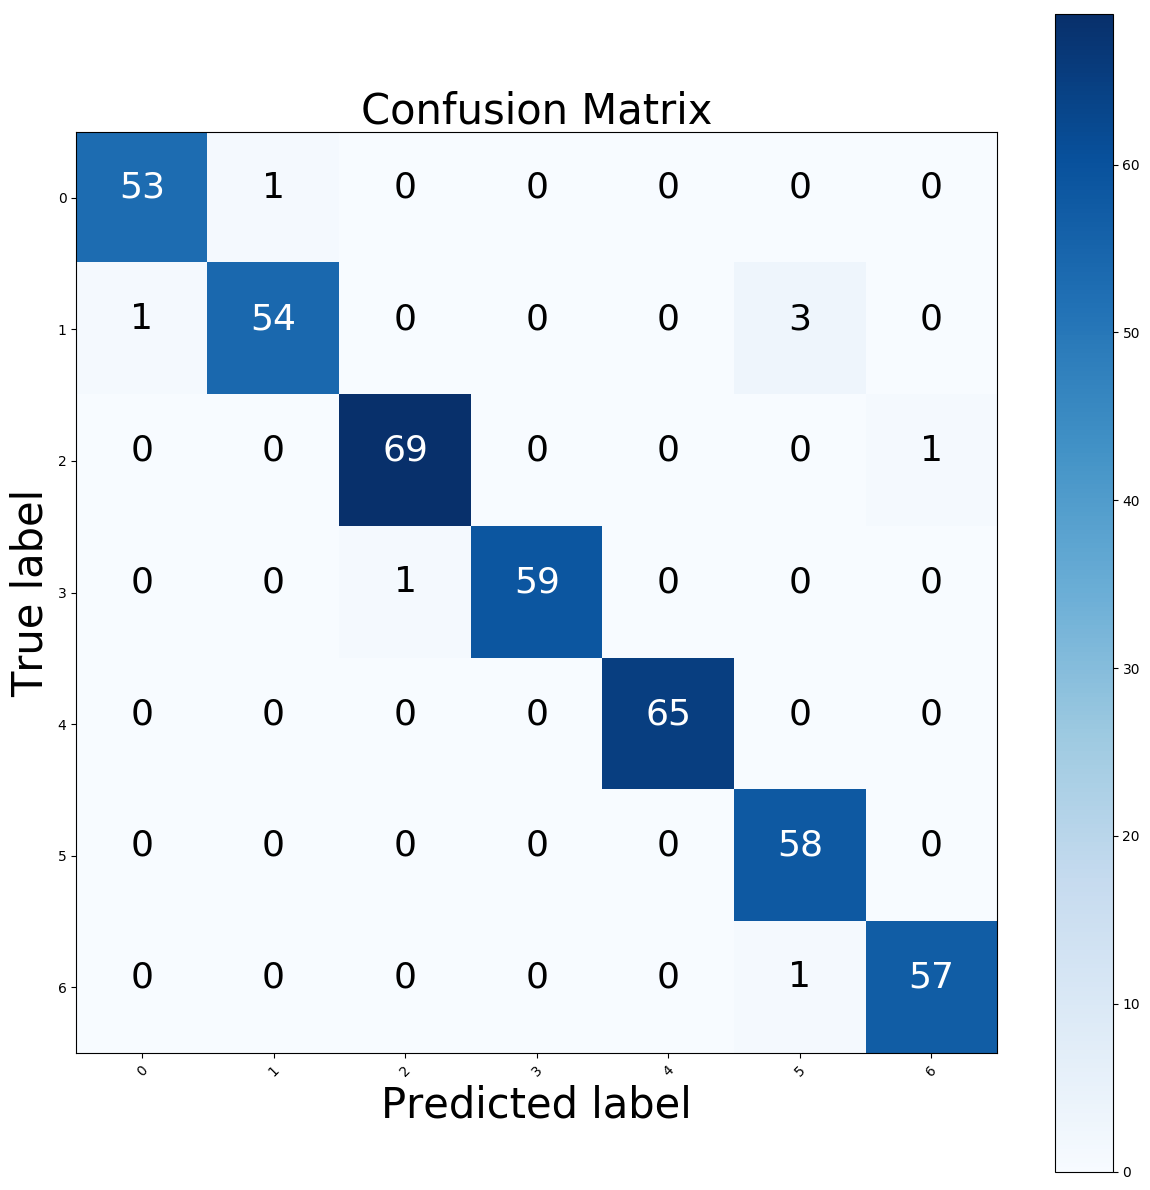

In [31]:
from sklearn.metrics import confusion_matrix

# calculate
confusion_matrix = confusion_matrix(testing_y, testing_y_pred)
normed_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
num_classes = np.unique(classes)

cmap=plt.cm.Blues
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = 'd'
thresh = confusion_matrix.max() / 2.0

for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=26)


plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)




Text(0.5,109.486,'Predicted label')

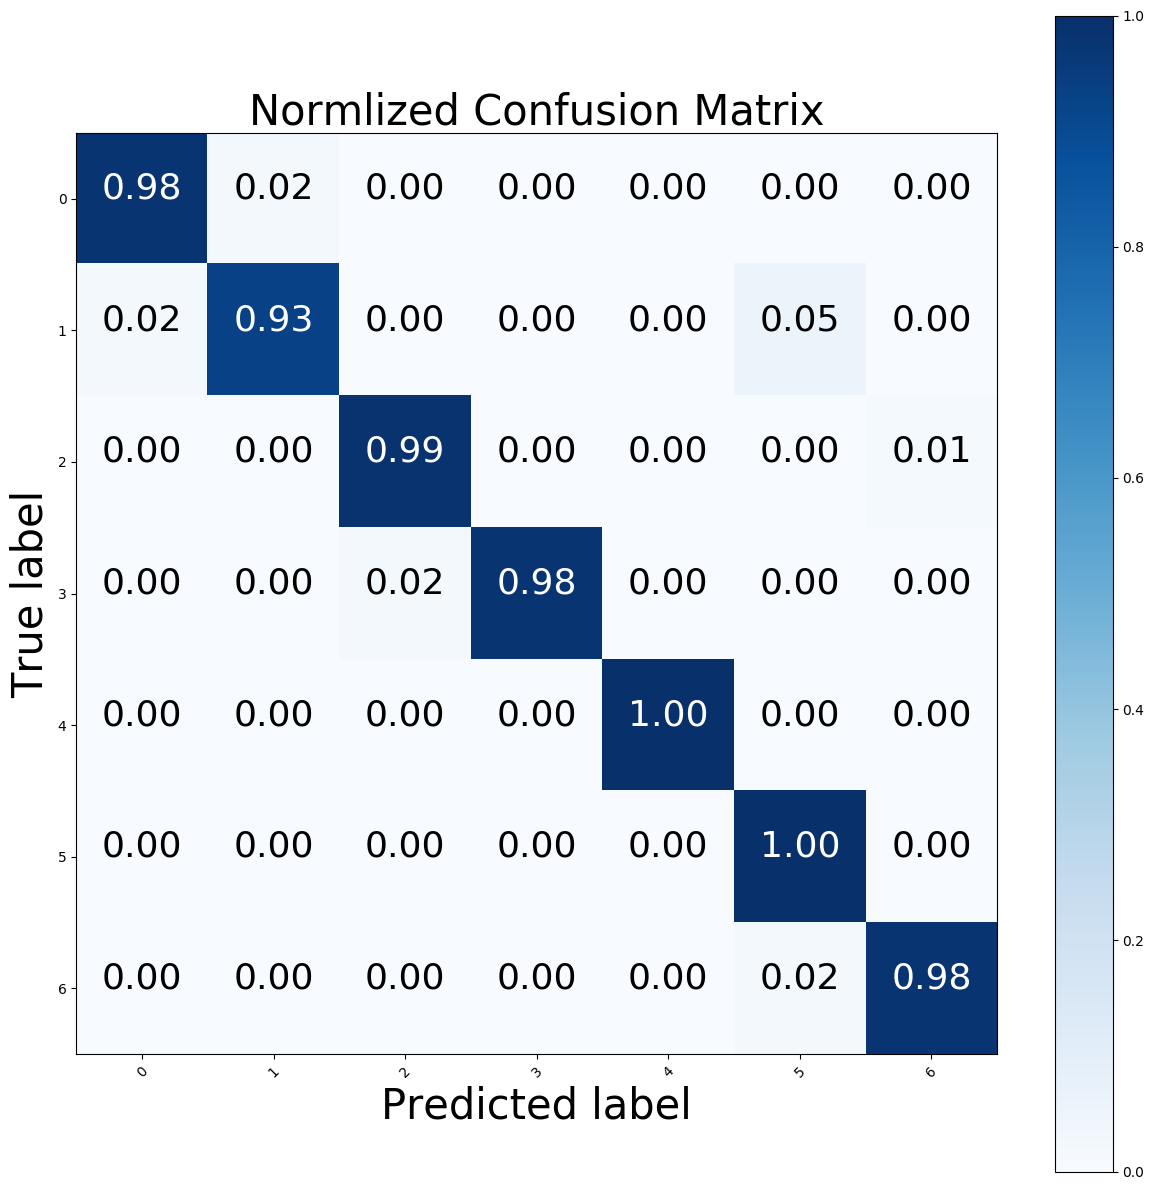

In [32]:
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(normed_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Normlized Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = '.2f'
thresh = confusion_matrix.max() / 2.0
for i, j in itertools.product(range(normed_confusion_matrix.shape[0]), range(normed_confusion_matrix.shape[1])):
    plt.text(j, i, format(normed_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=26)

plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)

# Learning Curve

In [46]:
train_sizes = np.append(np.linspace(0.05, 0.1, 20, endpoint=False),
                            np.linspace(0.1, 1, 20, endpoint=True))

# calculate

# # balanced accuracy
# balanced_accuracy_train_sizes, balanced_accuracy_train_scores, balanced_accuracy_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=data1_scorer,
#     n_jobs=4,
#     random_state=seed)


# unbalanced accuracy
accuracy_train_sizes, accuracy_train_scores, accuracy_test_scores = sklearn.model_selection.learning_curve(
    best_estimator,
    training_x,
    training_y,
    cv=5,
    train_sizes=train_sizes,
    verbose=10,
    scoring=make_scorer(accuracy_score),
    n_jobs=4,
    random_state=seed)





[learning_curve] Training set sizes: [  67   70   74   77   80   84   87   90   94   97  101  104  107  111
  114  117  121  124  127  131  134  198  262  326  389  453  517  581
  645  708  772  836  900  964 1027 1091 1155 1219 1283 1347]
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ........................ , score=0.718475073313783, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.7272727272727273, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.7419354838709677, total=   0.2s
[CV] ....................... , score=0.7390029325513197, total=   0.2s[CV]  ............................................

[Parallel(n_jobs=4)]: Done  12 out of 200 | elapsed:    0.9s remaining:   13.5s


[CV] ....................... , score=0.8123167155425219, total=   0.3s
[CV]  ................................................................
[CV] ........................ , score=0.841642228739003, total=   0.3s
[CV]  ................................................................
[CV] ....................... , score=0.8563049853372434, total=   0.3s
[CV]  ................................................................
[CV] ....................... , score=0.8592375366568915, total=   0.3s
[CV]  ................................................................
[CV] ....................... , score=0.8621700879765396, total=   0.3s
[CV]  ................................................................
[CV] ....................... , score=0.8826979472140762, total=   0.3s
[CV]  ................................................................
[CV] ....................... , score=0.8592375366568915, total=   0.3s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=4)]: Done  33 out of 200 | elapsed:    4.5s remaining:   22.7s


[CV] ....................... , score=0.9736070381231672, total=   1.2s
[CV]  ................................................................
[CV] ....................... , score=0.9765395894428153, total=   1.3s
[CV]  ................................................................
[CV] ....................... , score=0.9794721407624634, total=   1.5s
[CV]  ................................................................
[CV] ....................... , score=0.9794721407624634, total=   1.6s
[CV]  ................................................................
[CV] ....................... , score=0.6588235294117647, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.6823529411764706, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.9853372434017595, total=   1.6s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=4)]: Done  54 out of 200 | elapsed:    7.7s remaining:   20.8s


[CV] ....................... , score=0.7852941176470588, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.7941176470588235, total=   0.2s
[CV] ....................... , score=0.8117647058823529, total=   0.3s[CV]  ................................................................

[CV]  ................................................................
[CV] ....................... , score=0.8058823529411765, total=   0.3s
[CV]  ................................................................
[CV] ..................................... , score=0.85, total=   0.3s
[CV]  ................................................................
[CV] ....................... , score=0.8705882352941177, total=   0.4s
[CV]  ................................................................
[CV] ....................... , score=0.9117647058823529, total=   0.5s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=4)]: Done  75 out of 200 | elapsed:   11.6s remaining:   19.4s


[CV] ....................... , score=0.9588235294117647, total=   1.4s
[CV]  ................................................................
[CV] ....................... , score=0.9558823529411765, total=   1.5s
[CV]  ................................................................
[CV] ....................... , score=0.6765578635014837, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.7032640949554896, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.9676470588235294, total=   1.5s
[CV]  ................................................................
[CV] ....................... , score=0.7032640949554896, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.7151335311572701, total=   0.2s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=4)]: Done  96 out of 200 | elapsed:   14.1s remaining:   15.3s


[CV] ....................... , score=0.8011869436201781, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.8011869436201781, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.8991097922848664, total=   0.4s
[CV]  ................................................................
[CV] ....................... , score=0.9436201780415431, total=   0.5s
[CV]  ................................................................
[CV] ....................... , score=0.9317507418397626, total=   0.5s
[CV]  ................................................................
[CV] ....................... , score=0.9436201780415431, total=   0.6s
[CV]  ................................................................
[CV] ....................... , score=0.9554896142433235, total=   0.7s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=4)]: Done 117 out of 200 | elapsed:   19.6s remaining:   13.9s


[CV] ....................... , score=0.7083333333333334, total=   0.2s
[CV]  ................................................................
[CV] ........................ , score=0.973293768545994, total=   1.6s
[CV]  ................................................................
[CV] ....................... , score=0.7321428571428571, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.7023809523809523, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.7172619047619048, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.7023809523809523, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.7232142857142857, total=   0.2s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=4)]: Done 138 out of 200 | elapsed:   21.7s remaining:    9.7s


[CV] ....................... , score=0.8363095238095238, total=   0.3s
[CV]  ................................................................
[CV] ........................ , score=0.973293768545994, total=   1.5s
[CV]  ................................................................
[CV] ....................... , score=0.9017857142857143, total=   0.4s
[CV]  ................................................................
[CV] ....................... , score=0.9166666666666666, total=   0.5s
[CV]  ................................................................
[CV] ....................... , score=0.9434523809523809, total=   0.6s
[CV]  ................................................................
[CV] ................................... , score=0.9375, total=   0.7s
[CV]  ................................................................
[CV] ....................... , score=0.9434523809523809, total=   0.7s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=4)]: Done 159 out of 200 | elapsed:   26.7s remaining:    6.9s


[CV] ....................... , score=0.6946107784431138, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.9732142857142857, total=   1.6s
[CV]  ................................................................
[CV] ....................... , score=0.7035928143712575, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.7365269461077845, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.6976047904191617, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.9732142857142857, total=   1.7s
[CV]  ................................................................
[CV] ....................... , score=0.7335329341317365, total=   0.2s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=4)]: Done 180 out of 200 | elapsed:   28.7s remaining:    3.2s


[CV] ....................... , score=0.8952095808383234, total=   0.4s
[CV]  ................................................................
[CV] ....................... , score=0.9341317365269461, total=   0.5s
[CV]  ................................................................
[CV] ....................... , score=0.9461077844311377, total=   0.5s
[CV]  ................................................................
[CV] ....................... , score=0.9491017964071856, total=   0.6s
[CV]  ................................................................

[CV] ....................... , score=0.7095808383233533, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.9491017964071856, total=   0.7s
[CV]  ................................................................
[CV] ....................... , score=0.9491017964071856, total=   0.8s
[CV]  ................................................................
[CV] 

[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   35.3s finished


In [47]:
# # plot
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('Balanced Accuracy Learning Curve', fontsize=35)

# plt.xlabel('Training examples (count)', fontsize=30)
# plt.ylabel('Balanced Accuracy (0.0 - 1.0)', fontsize=30)
# plt.grid()
# plt.tight_layout()

# train_scores = balanced_accuracy_train_scores
# test_scores = balanced_accuracy_test_scores
# train_sizes = balanced_accuracy_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# ---------------------------------------------------------------


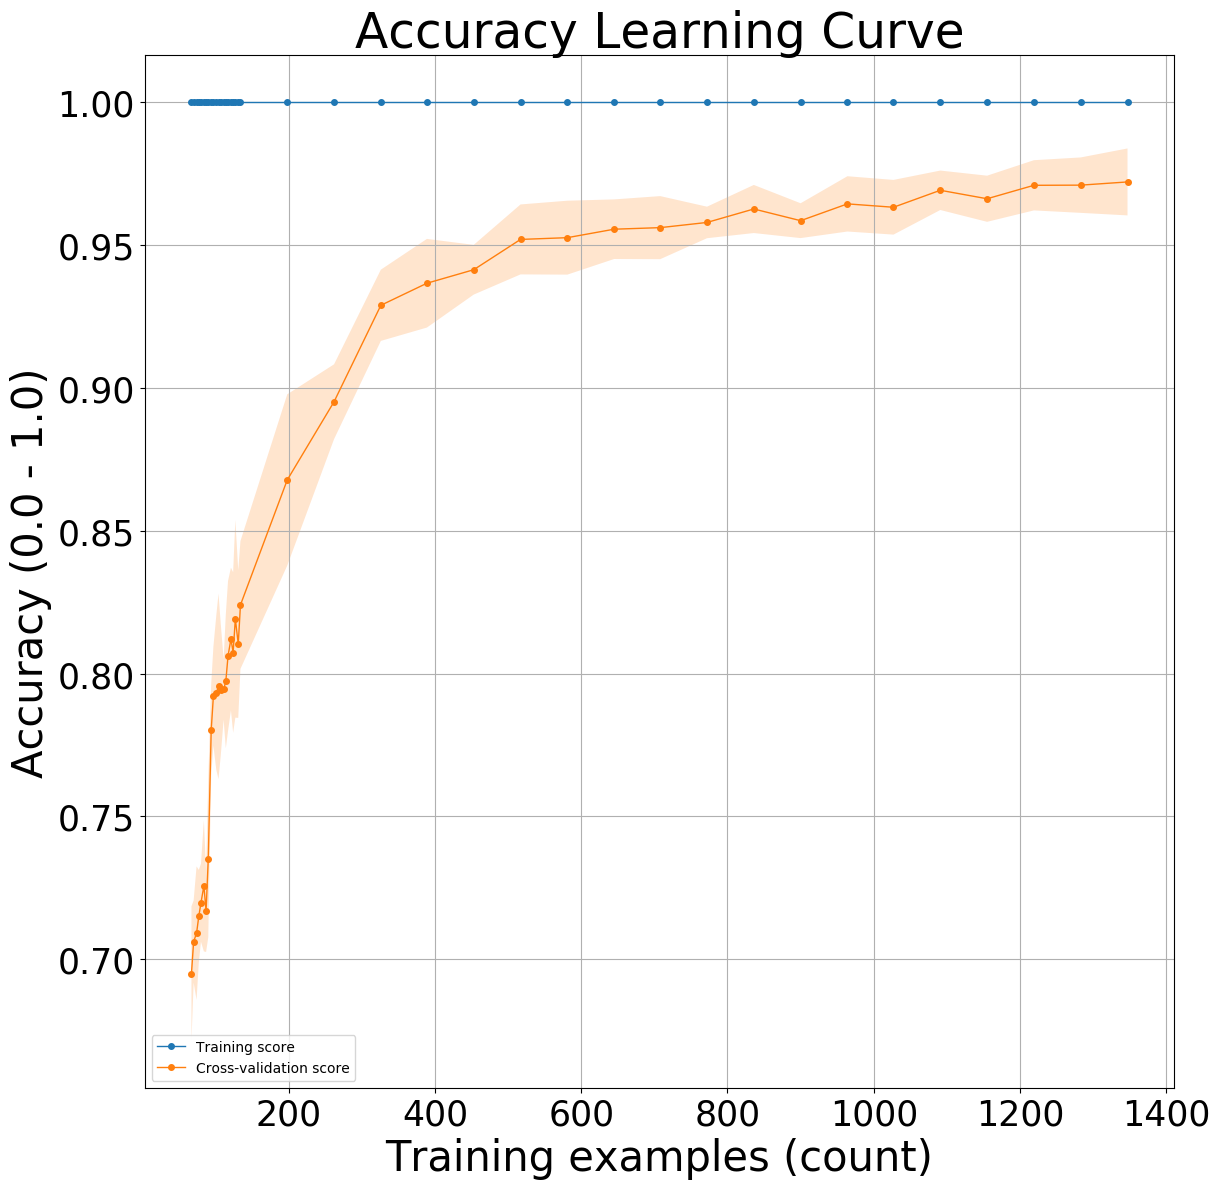

In [49]:
plt.close()
plt.figure(figsize=(12, 12))
plt.tick_params(labelsize=25)

plt.title('Accuracy Learning Curve', fontsize=35)

plt.xlabel('Training examples (count)', fontsize=30)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=30)
plt.grid()
plt.tight_layout()

train_scores = accuracy_train_scores
test_scores = accuracy_test_scores
train_sizes = accuracy_train_sizes

train_points = train_scores
test_points = test_scores

ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
         label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
         label="Cross-validation score")

plt.legend(loc="best")



# ---------------------------------------------------------------



In [ ]:
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('Precision Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = precision_train_scores
# test_scores = precision_test_scores
# train_sizes = precision_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# # -------------------------------------------


In [ ]:
# plt.close()
# plt.figure(figsize=(12, 12))

# plt.title('Recall Accuracy Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = recall_train_scores
# test_scores = recall_test_scores
# train_sizes = recall_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")


# # -------------------------------------------


In [ ]:
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('ROC-AUC Accuracy Learning Curve')
# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = roc_auc_train_scores
# test_scores = roc_auc_test_scores
# train_sizes = roc_auc_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# Compelxity Param: n_estimators

In [41]:
# balanced_accuracy_train_scores, balanced_accuracy_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "n_estimators", n_estimators, cv=5,
#                                                  scoring=data1_scorer, n_jobs=4)
n_estimators_adjust =  [2, 5, 10, 20, 30, 45, 60, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
accuracy_train_scores, accuracy_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "n_estimators", n_estimators_adjust, cv=5,
                                                 scoring=make_scorer(accuracy_score), n_jobs=4)

# precision_train_scores, precision_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "n_estimators", n_estimators, cv=5,
#                                                  scoring=make_scorer(precision_score), n_jobs=4)

# recall_train_scores, recall_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "n_estimators", n_estimators, cv=5,
#                                                  scoring=make_scorer(recall_score), n_jobs=4)

# roc_auc_train_scores, roc_auc_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "n_estimators", n_estimators, cv=5,
#                                                  scoring=make_scorer(roc_auc_score), n_jobs=4)

In [42]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: n_estimators')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = balanced_accuracy_train_scores
# test_scores = balanced_accuracy_test_scores
# train_sizes = n_estimators

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

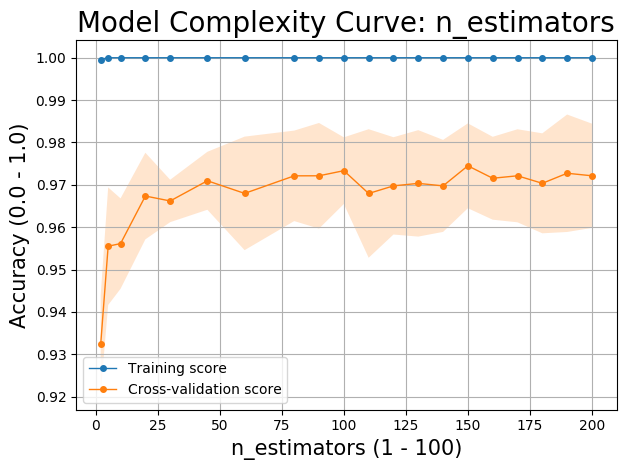

In [44]:
plt.close('all')
plt.figure()
plt.title('Model Complexity Curve: n_estimators', fontsize=20)

plt.xlabel('n_estimators (1 - 100)', fontsize=15)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=15)
plt.grid()
plt.tight_layout()

train_scores = accuracy_train_scores
test_scores = accuracy_test_scores
train_sizes = n_estimators_adjust

train_points = train_scores
test_points = test_scores
ax = plt.gca()
x_scale = 'linear'
y_scale = 'linear'

ax.set_xscale(x_scale)
ax.set_yscale(y_scale)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
     label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
     label="Cross-validation score")

plt.legend(loc="best")
plt.tight_layout()


In [32]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: n_estimators')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = precision_train_scores
# test_scores = precision_test_scores
# train_sizes = n_estimators

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

In [33]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: n_estimators')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = recall_train_scores
# test_scores = recall_test_scores
# train_sizes = n_estimators

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

In [34]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: n_estimators')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = roc_auc_train_scores
# test_scores = roc_auc_test_scores
# train_sizes = n_estimators

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

# Timing Curve

In [50]:
from time import clock


sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
tests = 5
out = dict()
out['train'] = np.zeros(shape=(len(sizes), tests))
out['test'] = np.zeros(shape=(len(sizes), tests))

for i, frac in enumerate(sizes):
    for j in range(tests):
        np.random.seed(seed)
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(training_x, training_y, test_size=1 - frac, random_state=seed)
        st = clock()
        best_estimator.fit(x_train, y_train)
        out['train'][i, j] = (clock() - st)
        st = clock()
        best_estimator.predict(x_test)
        out['test'][i, j] = (clock() - st)


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.pr

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.pr

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.pr

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.pr

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


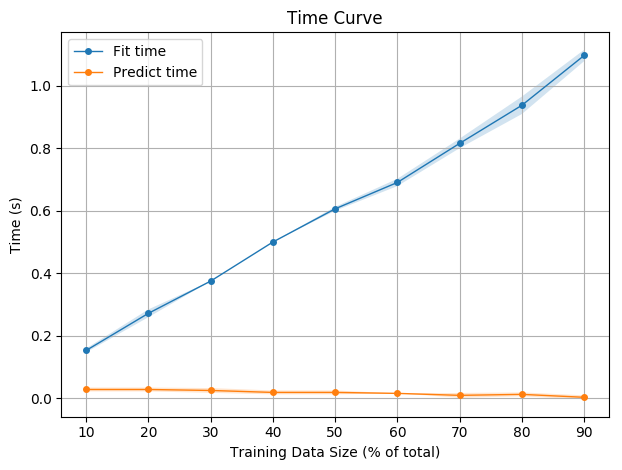

In [51]:
plt.close()
plt.figure()
plt.title("Time Curve")

plt.xlabel("Training Data Size (% of total)")
plt.ylabel("Time (s)")
fit_scores_mean = np.mean(out['train'], axis=1)
fit_scores_std = np.std(out['train'], axis=1)
predict_scores_mean = np.mean(out['test'], axis=1)
predict_scores_std = np.std(out['test'], axis=1)
plt.grid()
plt.tight_layout()

plt.fill_between(np.array(sizes) * 100, fit_scores_mean - fit_scores_std,
                 fit_scores_mean + fit_scores_std, alpha=0.2)
plt.fill_between(np.array(sizes) * 100, predict_scores_mean - predict_scores_std,
                 predict_scores_mean + predict_scores_std, alpha=0.2)
plt.plot(np.array(sizes) * 100, fit_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Fit time")
plt.plot(np.array(sizes) * 100, predict_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Predict time")

plt.legend(loc="best")

In [52]:
print(fit_scores_mean)
print(predict_scores_mean)


[0.153125 0.271875 0.375    0.5      0.60625  0.690625 0.815625 0.9375
 1.096875]
[0.028125 0.028125 0.025    0.01875  0.01875  0.015625 0.009375 0.0125
 0.003125]
